# Comparing Unity and Fictrac Logs

We will extract trajectory data from the unity and fictrac logs using the `unityvr` package and analyse them.

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

from unityvr.preproc import logproc
from unityvr.viz import viz

## Unity Log

In [2]:
rootDir = "../../../../data.nosync/unityvr/debugging/"
subDir = "y-maze/WTB/f01"
dirName = rootDir+'/raw/'+subDir

fileName = "Log_2021-08-12_19-16-41_WTB_f01_ymz_t02.json"

In [3]:
dat = logproc.openUnityLog(dirName, fileName)
objDf = logproc.objDfFromLog(dat)
posDf, ftDf, tsDf = logproc.timeseriesDfFromLog(dat)

No analog input data was recorded.
No fictrac signal was recorded.


In [4]:
#button press movement
condition = (np.abs(posDf['dx'])>0.0099)|(np.abs(posDf['dy'])>0.0099)

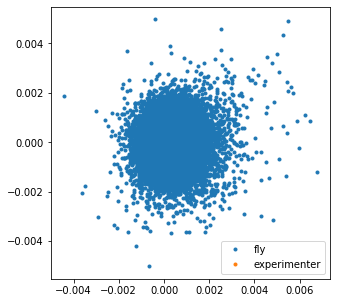

In [5]:
plt.figure(figsize=(5,5))
plt.plot(posDf['dx'],posDf['dy'],'.');
plt.plot(posDf['dx'].loc[condition],posDf['dy'].loc[condition],'.');
plt.legend(['fly','experimenter']);

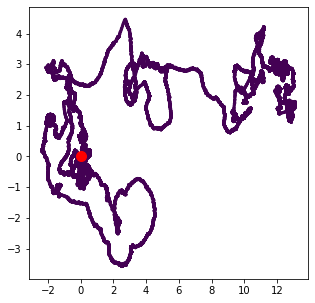

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(posDf['x']*10,posDf['y']*10,c=condition.astype('int'),s=5);
plt.plot(0,0,'ro',markersize=10);

## Fictrac Log

In [7]:
fictracLog = "fictrac-20210812_191816.dat"
ftTrajDf = logproc.ftTrajDfFromLog(dirName, fictracLog)

In [8]:
f = np.array([[1, 0],
               [0, -1]])
posDf['x'],posDf['y'] = np.matmul(f,np.array([posDf['x'],posDf['y']]))

In [9]:
theta = -np.pi/4
r = np.array([[np.cos(theta), -np.sin(theta)],
               [np.sin(theta),  np.cos(theta)]])
posDf['x'],posDf['y'] = np.matmul(r,np.array([posDf['x'],posDf['y']]))

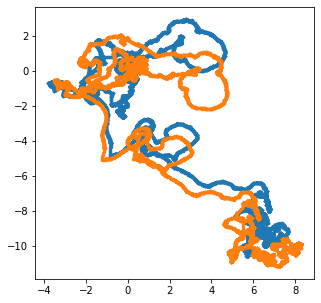

In [10]:
plt.figure(figsize=(5,5))
after = 0 if np.sum(condition)<1 else np.where(condition)[0][-1]
plt.scatter(ftTrajDf['x']*0.044*10,ftTrajDf['y']*0.044*10,s=5);
plt.scatter((posDf['x'].iloc[after:]-posDf['x'].iloc[after])*10,(posDf['y'].iloc[after:]-posDf['y'].iloc[after])*10,s=5);